# MLReg.py

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from numpy import asarray
from numpy import savetxt
from bs4 import BeautifulSoup

In [ ]:
# read the file
df = pd.read_csv("fifa_cleaned.csv")
df.head

<bound method NDFrame.head of        sofifa_id         short_name  age  height_cm  weight_kg nationality  \
0         158023           L. Messi   33        170         72   Argentina   
1          20801  Cristiano Ronaldo   35        187         83    Portugal   
2         200389           J. Oblak   27        188         87    Slovenia   
3         188545     R. Lewandowski   31        184         80      Poland   
4         190871          Neymar Jr   28        175         68      Brazil   
...          ...                ...  ...        ...        ...         ...   
18939     256679          K. Angulo   24        176         73    Colombia   
18940     257710     Zhang Mengxuan   21        177         70    China PR   
18941     250989      Wang Zhenghao   20        185         74    China PR   
18942     257697        Chen Zitong   23        186         80    China PR   
18943     257936           Song Yue   28        185         79    China PR   

                                 

In [ ]:
# thankfully no null values to worry about
df.isnull().sum()
#had any of the 70 decision variables sum's been nonzero 
#we would have needed to replace null values

sofifa_id           0
short_name          0
age                 0
height_cm           0
weight_kg           0
                   ..
high_Work_Rate      0
low_Work_Rate       0
medium_Work_Rate    0
right_foot          0
left_foot           0
Length: 70, dtype: int64

In [ ]:
df_dc = pd.get_dummies(df, columns=['nationality'])
df_dc.head


<bound method NDFrame.head of        sofifa_id         short_name  age  height_cm  weight_kg  \
0         158023           L. Messi   33        170         72   
1          20801  Cristiano Ronaldo   35        187         83   
2         200389           J. Oblak   27        188         87   
3         188545     R. Lewandowski   31        184         80   
4         190871          Neymar Jr   28        175         68   
...          ...                ...  ...        ...        ...   
18939     256679          K. Angulo   24        176         73   
18940     257710     Zhang Mengxuan   21        177         70   
18941     250989      Wang Zhenghao   20        185         74   
18942     257697        Chen Zitong   23        186         80   
18943     257936           Song Yue   28        185         79   

                                 club_name              league_name  \
0                             FC Barcelona   Spain Primera Division   
1                                 J

In [ ]:
dfn = df_dc.dropna(axis=1)
dfn

,sofifa_id,short_name,age,height_cm,weight_kg,league_rank,overall,potential,value_eur,wage_eur,...,nationality_Uganda,nationality_Ukraine,nationality_United Arab Emirates,nationality_United States,nationality_Uruguay,nationality_Uzbekistan,nationality_Venezuela,nationality_Wales,nationality_Zambia,nationality_Zimbabwe
0,158023,L. Messi,33,170,72,1,0.93,0.93,67500000,560000,...,0,0,0,0,0,0,0,0,0,0
1,20801,Cristiano Ronaldo,35,187,83,1,0.92,0.92,46000000,220000,...,0,0,0,0,0,0,0,0,0,0
2,200389,J. Oblak,27,188,87,1,0.91,0.93,75000000,125000,...,0,0,0,0,0,0,0,0,0,0
3,188545,R. Lewandowski,31,184,80,1,0.91,0.91,80000000,240000,...,0,0,0,0,0,0,0,0,0,0
4,190871,Neymar Jr,28,175,68,1,0.91,0.91,90000000,270000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,256679,K. Angulo,24,176,73,1,0.47,0.52,40000,500,...,0,0,0,0,0,0,0,0,0,0
18940,257710,Zhang Mengxuan,21,177,70,1,0.47,0.52,35000,1000,...,0,0,0,0,0,0,0,0,0,0
18941,250989,Wang Zhenghao,20,185,74,1,0.47,0.51,35000,1000,...,0,0,0,0,0,0,0,0,0,0
18942,257697,Chen Zitong,23,186,80,1,0.47,0.51,40000,1000,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# splitting the data into training set (70%) and testing set (30%) 
train, test = train_test_split(dfn, test_size = 0.3)
# 70/30 split more accurate that 80/20

In [ ]:
# here we are identifying the target decision variable 
x_train = train.drop(columns = ['overall', 'short_name', 'player_traits'], axis = 1)
y_train = train['overall']

x_test = test.drop(columns = ['overall', 'short_name', 'player_traits'], axis = 1)
y_test = test['overall']

In [ ]:
# we begin the multiple linear regression prediction
regressor = LinearRegression()
regressor.fit(x_train, y_train)
score = regressor.score(x_test, y_test)
score

0.940742252465079

In [ ]:
# Predicting the Test set results
model = LinearRegression()
pred = regressor.predict(x_test)
print("predicted values:\n\n", pred, "\n\n\n")

predicted values:

 [0.73175011 0.68778363 0.68901148 ... 0.66161393 0.66353956 0.61116028] 





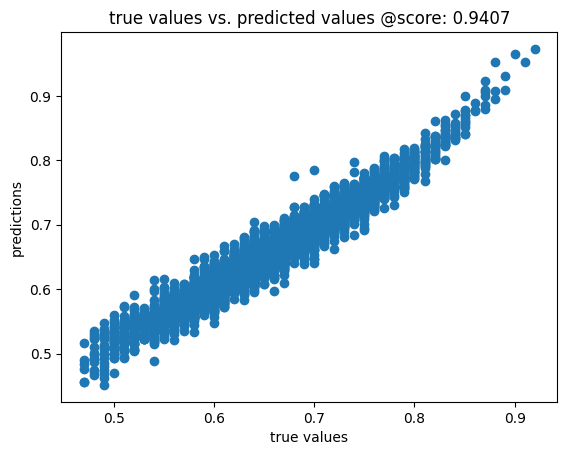

In [ ]:
# compare predictions with actual values
plt.scatter(y_test, pred)
plt.xlabel('true values')
plt.ylabel('predictions')
plt.title('true values vs. predicted values @score: {0:.4f}'.format(score))
plt.show()

# MLRegEval.py

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from sklearn import metrics
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from numpy import asarray
from numpy import savetxt
from sklearn.linear_model import Ridge

In [ ]:
# formal evaluation 1: RidgeRegression

# default with alpha/shrinkage at 1.0
ridge = Ridge().fit(x_train, y_train)
ridge_def_score = ridge.score(x_test, y_test)

c:\Users\danie\miniconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=5.08406e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [ ]:
# with alpha/shrinkage parameter set to 1000.0, anything smaller and error
ridge10 = Ridge(alpha = 10).fit(x_train, y_train)
ridge10_score = ridge10.score(x_test, y_test)

c:\Users\danie\miniconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=5.00674e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [ ]:
ridge10

Ridge(alpha=10)

In [ ]:
ridge10_score

0.9344395092078286

In [ ]:
# with alpha/shrinkage parameter set to 10000.0
ridge01 = Ridge(alpha = 0.1).fit(x_train, y_train)
ridge01_score = ridge01.score(x_test, y_test)

c:\Users\danie\miniconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=5.09918e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [ ]:
ridge01_score

0.940757672093364

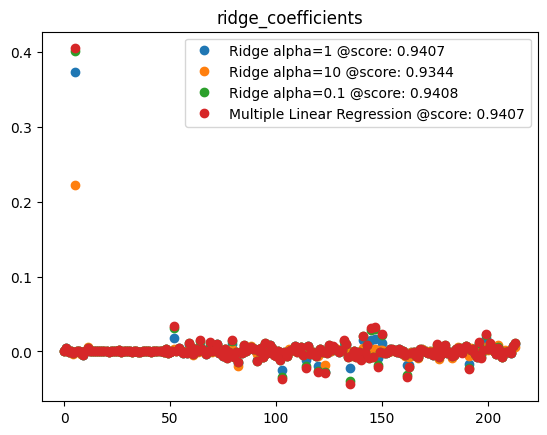

In [ ]:
# visualize the differences
plt.title("ridge_coefficients")
plt.plot(ridge.coef_, 'o', label="Ridge alpha=1 @score: {0:.4f}".format(ridge_def_score)) 
plt.plot(ridge10.coef_, 'o', label="Ridge alpha=10 @score: {0:.4f}".format(ridge10_score)) 
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1 @score: {0:.4f}".format(ridge01_score))
plt.plot(regressor.coef_, 'o', label="Multiple Linear Regression @score: {0:.4f}".format(score)) 
#plt.ylim(-25, 25)
plt.legend()

In [ ]:
# cross -validation evaluation

# print the score
regressor.fit(x_train, y_train)
score_reg = regressor.score(x_test, y_test)
print("score: ", score_reg, "\n")


score:  0.940742252465079 



In [ ]:
# applying cross validation measurement at an interval of 10
pred2 = cross_val_predict(regressor, x_test, y_test, cv=10)
print("cross validation measured values\n", pred2, "\n")

cross validation measured values
 [0.73053332 0.68144845 0.69403163 ... 0.66973854 0.66496896 0.61430554] 



In [ ]:
# now show the validated values at every 10th interval
cross_val_scores = cross_val_score(regressor, x_test, y_test, cv=10)
print ("cross validation scores at every 10th interval:\n", cross_val_scores, "\n")

cross validation scores at every 10th interval:
 [0.94030107 0.93264417 0.93837823 0.93421571 0.93525782 0.94716645
 0.94163235 0.94317276 0.93563899 0.93442399] 



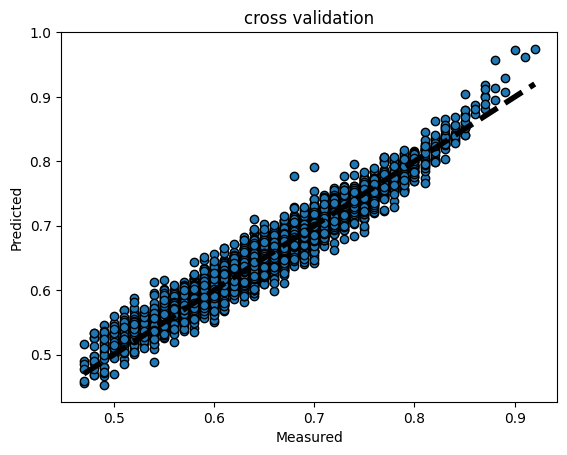

In [ ]:
# rounding it up with visualzation
fig, ax = plt.subplots()
ax.scatter(y_test, pred2, edgecolors=(0,0,0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('cross validation')
plt.show()

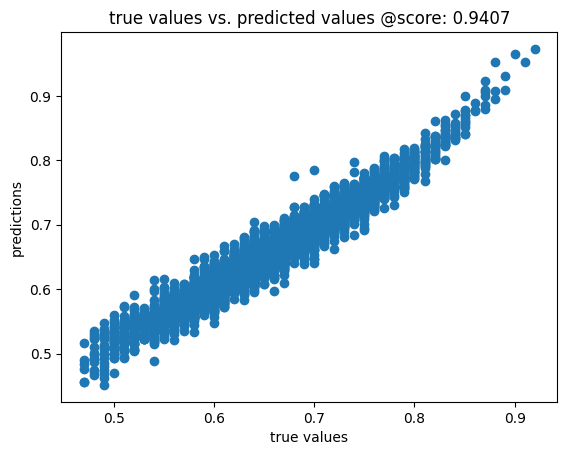

In [ ]:
# compare predictions with actual values
plt.scatter(y_test, pred)
plt.xlabel('true values')
plt.ylabel('predictions')
plt.title('true values vs. predicted values @score: {0:.4f}'.format(score))
plt.show()